Problem Statement: The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. Note: You can find the dataset in the link below. Downlaod Files: https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv

In [1]:
# importing required initial libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("titanic_train.csv(2)")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# "Survived" is the target column based on the problem statement

In [6]:
# Check df information

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# check df data types

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Observations:

# 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked' are categorical column
# however 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch' data type is integer based on the discrete numbers in these columns


# Data types for 'Age' and 'Fare' are correct as they contain continuous data

In [9]:
# checking columns names


df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
# checking the size of the dataset

df.shape

(891, 12)

# Duplicate Values Check & Handling

In [11]:
# Check for duplicate values in the dataframe


duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the result Dataframe
duplicate

Duplicate Rows :


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
# Observations: No duplicate values present in the dataframe

In [13]:
# Checking the sum of null values for all columns

df.isnull(). sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
#getting percentage of null values present in data
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:title={'center':'Null values '}>

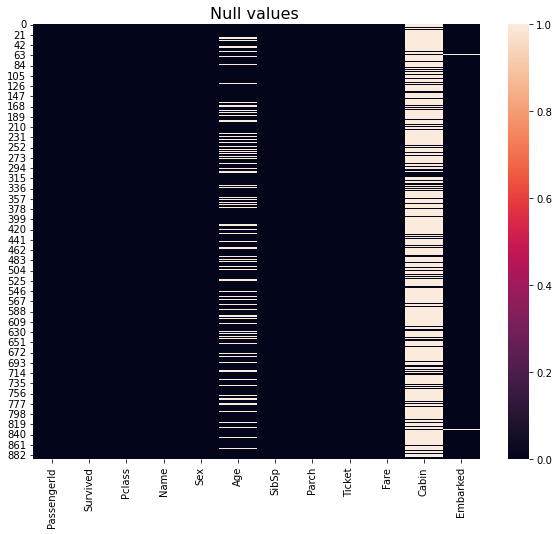

In [15]:
#ploting dataset for double check null values
plt.figure(figsize=(10,8))
plt.title('Null values ',fontsize=16)
sns.heatmap(df.isnull())

In [16]:
# Observations:

# 1) Null values present in 'Age', 'Cabin' and 'Embarked' columns

# 2) 'Cabin' is having 77% (more than 50%) null values hence dropping this column

# 3) 'Age' --> Continuous data. I will use 'median' to replace null values

# 4) 'Embarked' --> Categorical data. I will use first value of 'mode' to replace null values

In [17]:
# Dropping column "Cabin" due to 77% null values present in it
df.drop(["Cabin"],axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
# Filling null values of column with continuous data with 'median'
df["Age"]=df["Age"].fillna((df["Age"].median()))

In [19]:
# Cross checking the null values in "Age" column

df["Age"].isnull().sum()

0

In [20]:
# Filling null values of column with categorical data with first value of 'mode'


df['Embarked']=df['Embarked'].fillna((df['Embarked'].mode()[0]))


In [21]:
# Cross checking the null values in "Cabin" column
df['Embarked'].isnull().sum()

0

In [22]:
# Cross Checking the sum of null values for all columns

df.isnull(). sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# Observations: No null values present in dataset now

In [24]:
df.shape

(891, 11)

In [25]:
# Now dataset has 891 rows and 11 columns

# Segregating columns based on data type for better EDA

In [26]:
# Dataframe of columns with Nominal Categorical Data

df_categorical=df[['PassengerId','Name','Ticket','Pclass','Sex','SibSp', 'Parch','Embarked']].copy()


In [27]:
df_categorical.columns

Index(['PassengerId', 'Name', 'Ticket', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

In [28]:
# Dataframe of columns with Continuous Data
df_continuous=df[['Age','Fare']].copy()

In [29]:
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

In [30]:
# Dataframe of column with Target Data
df_target=df["Survived"].copy()

# Statistical Summary

In [31]:
# Statistical summary for continuous data
df_continuous.describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [32]:
# Observations:

# 1) Count: Same for "Age" and "Fare". Hence no null values present

# 2) I feel there is some skewness in the data. We will see it later and treat it

# 3) More difference between 75 percentile and max for columns: "Age" and "Fare". Hene outliers are present

# 4) Standard deviation is high for both columns "Age" and "Fare", hence data spread is high

In [33]:
# Statistical summary for nominal categorical data
df_categorical.describe(include="O")

,Name,Ticket,Sex,Embarked
count,891,891,891,891
unique,891,681,2,3
top,"Braund, Mr. Owen Harris",347082,male,S
freq,1,7,577,646


In [34]:
# Observations:

# 1) count is same for all columns hence no null values present

# 2) Unique values present in columns: Sex --> 2, Embarked -->3, Ticket --> 681

# 3) Mode of columns: Sex --> male, Embarked -->S, Ticket --> 347082

# 4) Frequency of mode value of columns: Sex --> 577, Embarked -->646, Ticket -->7

# Visualization of data

In [35]:
# For the nominal categorical data, we use countplot as it will give frequency of the classes of columns

In [36]:
df_categorical.columns

Index(['PassengerId', 'Name', 'Ticket', 'Pclass', 'Sex', 'SibSp', 'Parch',
       'Embarked'],
      dtype='object')

3    491
1    216
2    184
Name: Pclass, dtype: int64


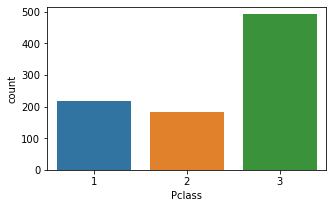

In [37]:
print(df_categorical["Pclass"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical["Pclass"])
plt.show()

In [38]:
# Observations:

# "Pclass": Total no. of "1" classes are 216, total no. of "2" classes are 184 and the totla no. of "3" classes are 491

male      577
female    314
Name: Sex, dtype: int64


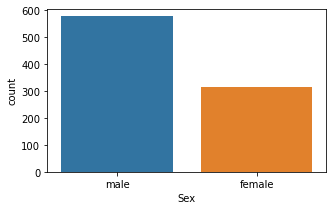

In [39]:
print(df_categorical["Sex"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical["Sex"])
plt.show()

In [40]:
# Observations:

# "Sex": Total no. of "male" classes are 577 and the totla no. of "female" classes are 314

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


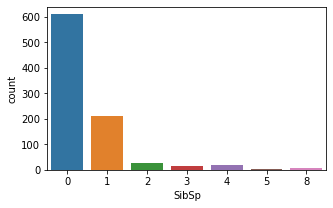

In [41]:
print(df_categorical["SibSp"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical["SibSp"])
plt.show()

In [42]:
# Observations:

# "SibSp" classes count: 0-->608, 1-->209, 2-->28, 4-->18, 3-->16, 8-->7, 5-->5

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


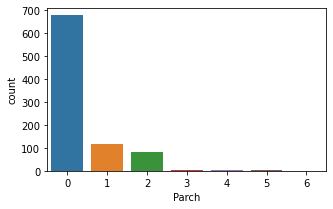

In [43]:
print(df_categorical["Parch"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical["Parch"])
plt.show()

In [44]:
# Observations: 

# "Parch" classes count: 0-->678, 1-->118, 2-->80, 5-->5, 3-->5, 4-->4, 6-->1



S    646
C    168
Q     77
Name: Embarked, dtype: int64


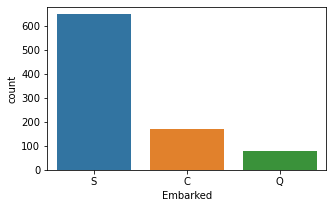

In [45]:
print(df_categorical["Embarked"].value_counts())
plt.figure(figsize=(5,3))
sns.countplot(df_categorical["Embarked"])
plt.show()

In [46]:
# Observations:

# "Embarked" classes count: S-->646, C-->168, Q-->77

<AxesSubplot:xlabel='Survived', ylabel='count'>

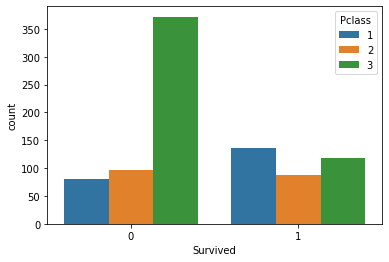

In [47]:
sns.countplot(x="Survived",hue = "Pclass",data = df)

In [48]:
# Observations: (0 mean no survival, 1 means survived) -->

# 1) Class 3 has less survival rate compared to Class 1 & 2

#  2) Class 1 has more survival rate compared to Class 2 & 3

# 3) More no. of Class 3 people compared to other classes

<Figure size 360x216 with 0 Axes>

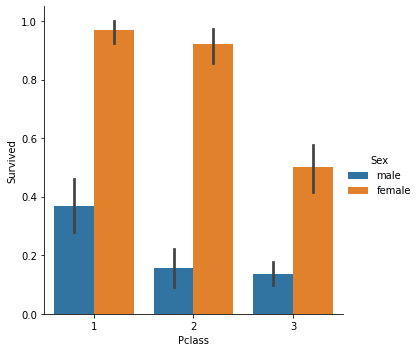

In [49]:
plt.figure(figsize=(5,3))
sns.catplot(x="Pclass",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

In [50]:
# Observations:

# 1) Female survival rate is more compared to male survival rate in all the classes

# 2) In 1st Pclass, majority of females are survived

# 3) In 3rd Pclass, male survival rate is very less

<AxesSubplot:xlabel='Survived', ylabel='count'>

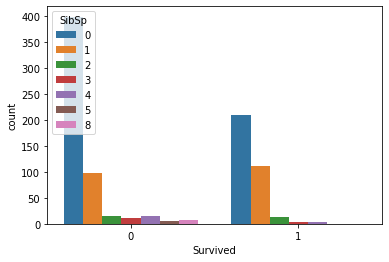

In [51]:
sns.countplot(x="Survived",hue = "SibSp",data = df)

In [52]:
# Observations: (0 mean no survival, 1 means survived) -->

# Most of the people belongs to Class 0 
# hence Class 0 shows less survival rate as well as high survival rate compared to other classes

<Figure size 360x216 with 0 Axes>

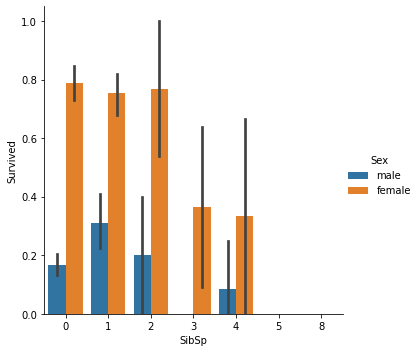

In [53]:
plt.figure(figsize=(5,3))
sns.catplot(x="SibSp",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

In [54]:
# Observations:

# 1) Female survival rate is more compared to male survival rate in all the classes

# 2) In Class 0, majority of the females are survived

# 3) In Class 4, male survival rate is very less

<Figure size 360x216 with 0 Axes>

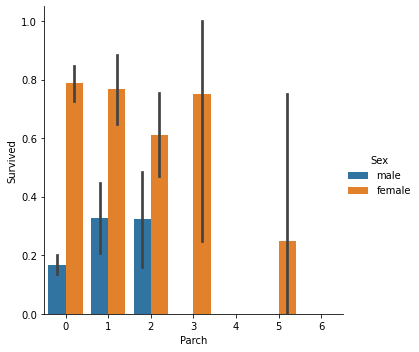

In [55]:
plt.figure(figsize=(5,3))
sns.catplot(x="Parch",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

In [56]:
# Observations:

#1) Female survival rate is more compared to male survival rate in all the classes

# 2) In Class 0, majority of the females are survived

# 3) In Class 0, male's survival rate is less compared to Classes 1 & 2

# 4) No survival for males from Classes 3 to 5

<Figure size 360x216 with 0 Axes>

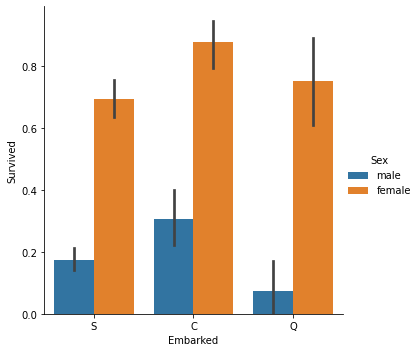

In [57]:
plt.figure(figsize=(5,3))
sns.catplot(x="Embarked",y="Survived",hue="Sex",data = df,kind="bar")
plt.show()

In [58]:
# Observations:

# 1) Female survival rate is more compared to male survival rate in all the classes

# 2) Class Q has less male's survival rate

In [59]:
# Visualization of Continuous data
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

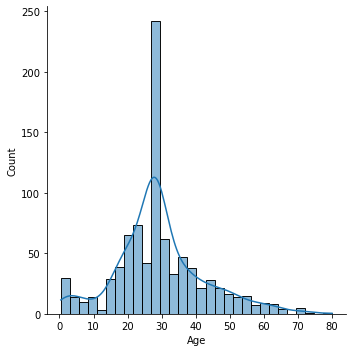

In [60]:
sns.displot(data=df,kde=True,x="Age")
plt.show()


In [61]:
# The data has skewness

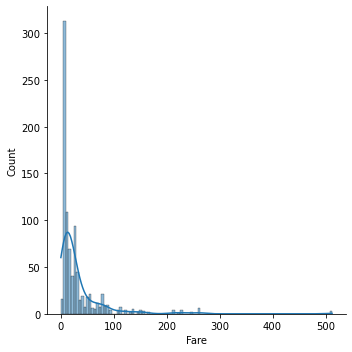

In [62]:
sns.displot(data=df,kde=True,x="Fare")
plt.show()


In [63]:
# Data is not noraml and has skewness

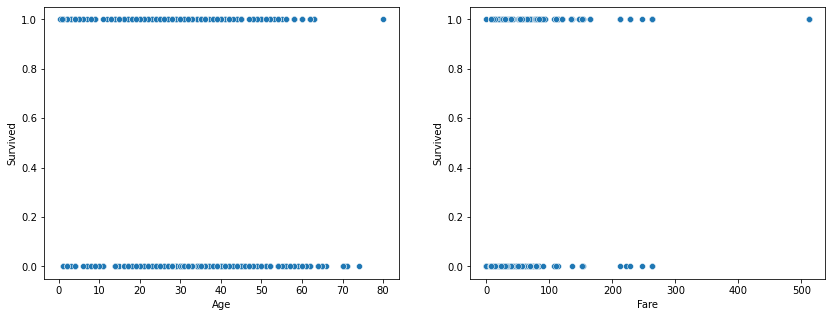

In [64]:
features = ['Age','Fare']
plt.subplots(figsize=(14,5))
for i ,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='Survived')
plt.show()


In [65]:
# Observations:

# 'Age': We can see that Age is equally distributed in the range of 0 to 65

# 'Fare': We can see that Age is equally distributed in the range of 0 to 260

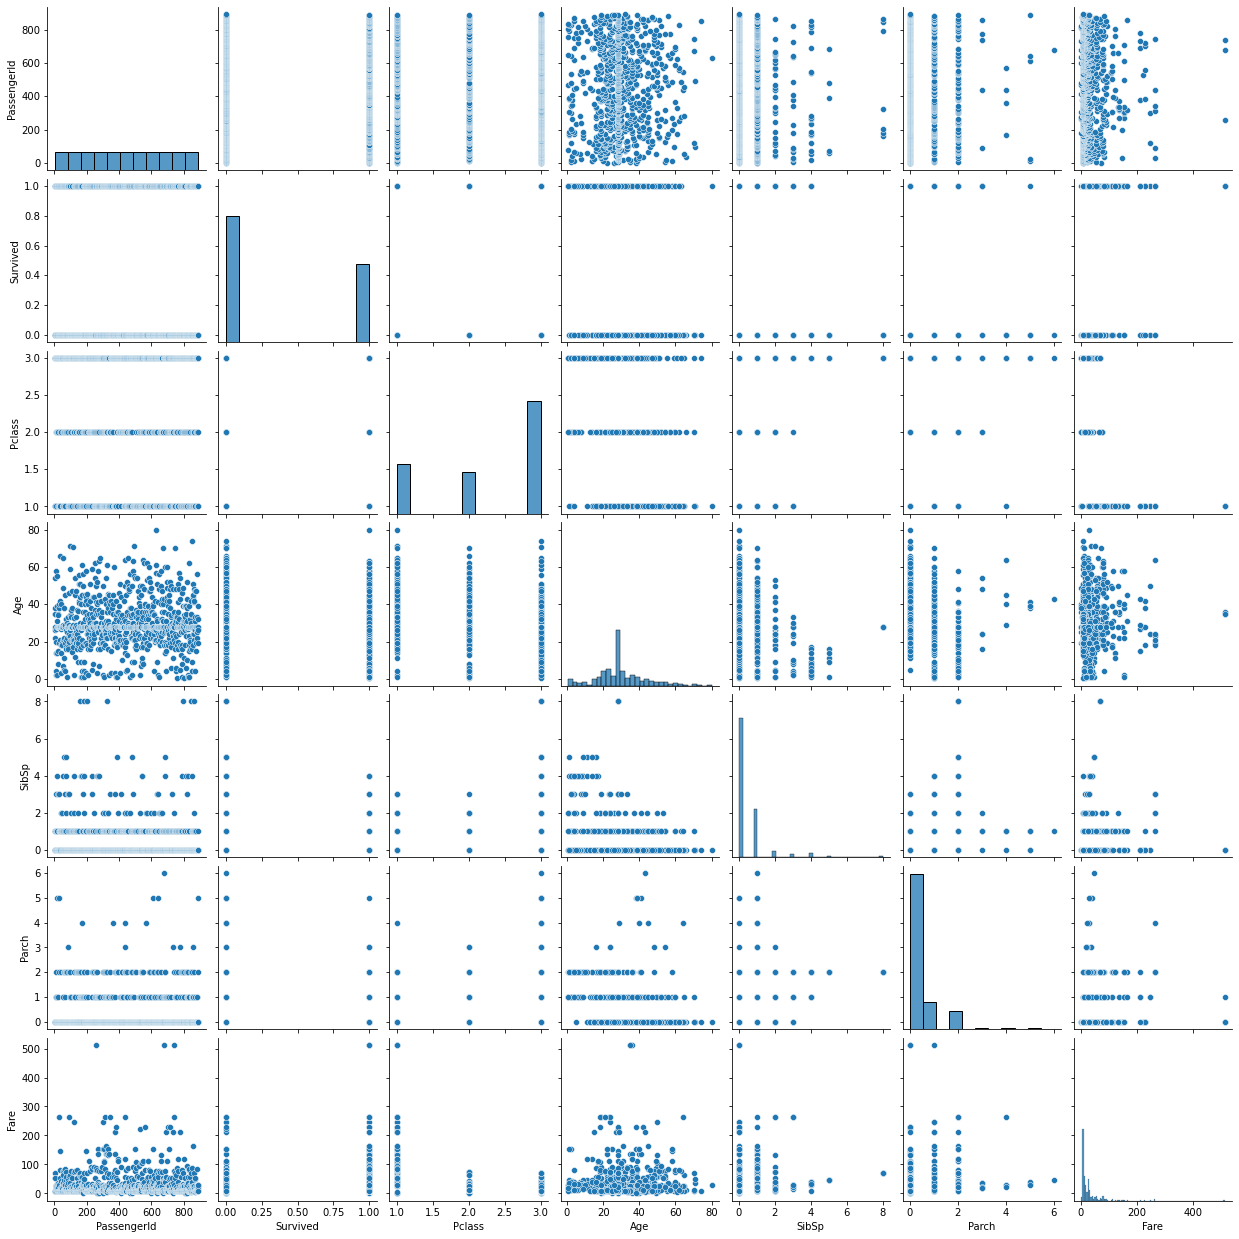

In [66]:
sns.pairplot(df)

In [67]:
# Observations:

# Based on the more density distribution of 'Age' Vs 'Fare' data lies flat, majorly both "Age" and "Fare" 
# are almost having flat linear relation

0    549
1    342
Name: Survived, dtype: int64


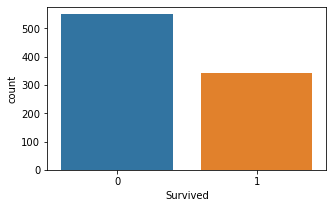

In [68]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(df["Survived"].value_counts())
sns.countplot(df["Survived"])
plt.show()

In [69]:
# Observations:

# Total no. of "Survived" class 0 are 549 and the totla no. of "Survived" class 1 are 342. Classes are imbalanced

In [70]:
# Visualization part is now completed

# Encoding of Categorical Data

In [71]:
# Using Ordinal Encoder to encode the data

In [72]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
# Encoding needed for columns "Name", "Sex", "Ticket", "Cabin" and "Embarked" to change string data to numerical format
df_encode=df[["Name", "Sex", "Ticket", "Embarked"]].copy()
df_encode.head(5)

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [74]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()  # creating instance for OrdinalEncoder

In [75]:
for i in df_encode.columns:
    df_encode[i]=enc.fit_transform(df_encode[i].values.reshape(-1,1))  # Transforming the data using OrdingalEncoder
df_encode.head(10)

,Name,Sex,Ticket,Embarked
0,108.0,1.0,523.0,2.0
1,190.0,0.0,596.0,0.0
2,353.0,0.0,669.0,2.0
3,272.0,0.0,49.0,2.0
4,15.0,1.0,472.0,2.0
5,554.0,1.0,275.0,1.0
6,515.0,1.0,85.0,2.0
7,624.0,1.0,395.0,2.0
8,412.0,0.0,344.0,2.0
9,576.0,0.0,132.0,0.0


In [76]:
# Dropping columns "Name", "Sex", "Ticket" and "Embarked" from original dataframe to add encoded data to the dataframe
df.drop(["Name", "Sex", "Ticket","Embarked"],axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [77]:
# Adding encoded columns to the original dataframe
df_n=pd.concat([df,df_encode],axis=1)
df_n.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,2.0
1,2,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,0.0
2,3,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,2.0
3,4,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,2.0
4,5,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,2.0


In [78]:
df=df_n
df.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,2.0
1,2,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,0.0
2,3,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,2.0
3,4,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,2.0
4,5,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,2.0


# Checking coefficients of correlation (r)

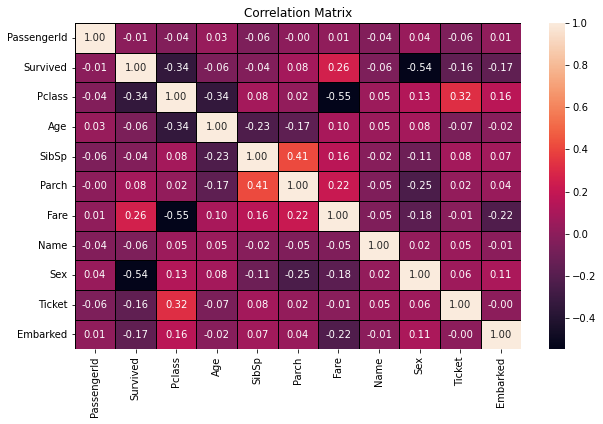

In [79]:
# Checking correlaiton coefficients to know the strength of relationship between variables
corr_r=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_r,annot=True,linewidths=0.5,linecolor='black',fmt=".2f")
plt.title("Correlation Matrix")
plt.savefig("correlation_matrix.jpg")
plt.show()

In [80]:
# Arranging the relationship of target variable with other variables in descending order

corr_r["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Name          -0.057343
Age           -0.064910
Ticket        -0.164549
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

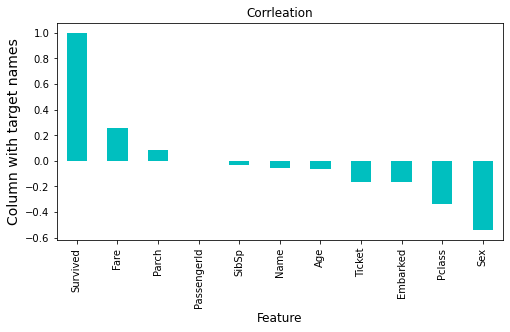

In [81]:
# Plotting the relationship of target variable with other variables in descending order

plt.figure(figsize=(8,4))
corr_r["Survived"].sort_values(ascending=False).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("Corrleation",fontsize=12)
plt.show()


In [82]:
# Observations: (Correlation of Target variable with features)

# 1) Max correlation: "Sex"

# 2) Min correlation: "PassengerId"

# 3) "PassengerId" has almost zero correlation hence will drop this column.

# 4) Typically -0.3 to +0.3 are considered as weak correlation however there are many columns having the relationship in this range with target variable
# hence removing only "PassengerId" with almost zero correlation based on correlation table

# 5)  I will check top 10 features that have strong relationship with target variable using SelectKBest algorithm
# and will take a call to remove further columns based on the comparison between corrleation table scores Vs SelectKBest scores


In [83]:
# Dropping "PassengerId" columns from the dataframe
df.drop(["PassengerId"],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,0,3,22.0,1,0,7.2500,108.0,1.0,523.0,2.0
1,1,1,38.0,1,0,71.2833,190.0,0.0,596.0,0.0
2,1,3,26.0,0,0,7.9250,353.0,0.0,669.0,2.0
3,1,1,35.0,1,0,53.1000,272.0,0.0,49.0,2.0
4,0,3,35.0,0,0,8.0500,15.0,1.0,472.0,2.0


# Checking top 10 features using SelectKBest algorithm

In [84]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X=df.drop("Survived",axis=1)  # #independent columns
y=df["Survived"]  # Output variable

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

      Specs        Score
4      Fare  4518.319091
7    Ticket  2871.655466
5      Name   435.568915
6       Sex    92.702447
0    Pclass    30.873699
1       Age    21.649163
8  Embarked    10.202525
3     Parch    10.097499
2     SibSp     2.581865


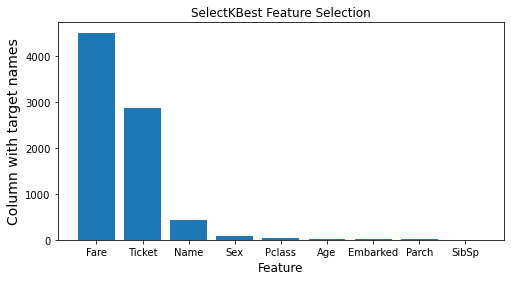

In [85]:
# Plotting the score values in descending order
df_sorted_desc= featureScores.sort_values('Score',ascending=False)
plt.figure(figsize=(8,4))
plt.bar('Specs','Score',data=df_sorted_desc)
plt.xlabel("Feature",fontsize=12)
plt.ylabel("Column with target names",fontsize=14)
plt.title("SelectKBest Feature Selection",fontsize=12)
plt.show()

In [86]:
# Observations:

# SibSp" has lower selectKBest score and also it has very weak correlation score of "-0.035322"
# hence dropping the column "SibSp" from the dataset

In [87]:
# Dropping "SibSp" columns from the dataframe
df.drop(["SibSp"],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,Parch,Fare,Name,Sex,Ticket,Embarked
0,0,3,22.0,0,7.2500,108.0,1.0,523.0,2.0
1,1,1,38.0,0,71.2833,190.0,0.0,596.0,0.0
2,1,3,26.0,0,7.9250,353.0,0.0,669.0,2.0
3,1,1,35.0,0,53.1000,272.0,0.0,49.0,2.0
4,0,3,35.0,0,8.0500,15.0,1.0,472.0,2.0


# Checking multi-Collinearity using VIF

In [88]:
# We don't apply VIF on categorical data hence checking on continuous data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_continuous[list(df_continuous.columns)]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,1.391179,Age
1,1.391179,Fare


In [89]:
# Observations:

# Typically we remove columns with VIF values > 5. Here VIF factor < 5
# hence there is no multi-collinearity between X features with continuous data, hence not removing any columns based on VIF score


# Pre-Processing

In [90]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Parch', 'Fare', 'Name', 'Sex', 'Ticket',
       'Embarked'],
      dtype='object')

In [91]:
# Segregating only X data
x=df.drop("Survived",axis=1)

In [92]:
x.head(5)

,Pclass,Age,Parch,Fare,Name,Sex,Ticket,Embarked
0,3,22.0,0,7.2500,108.0,1.0,523.0,2.0
1,1,38.0,0,71.2833,190.0,0.0,596.0,0.0
2,3,26.0,0,7.9250,353.0,0.0,669.0,2.0
3,1,35.0,0,53.1000,272.0,0.0,49.0,2.0
4,3,35.0,0,8.0500,15.0,1.0,472.0,2.0


In [93]:
# Segregating only Y data
y=df["Survived"]
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Checking Outliers

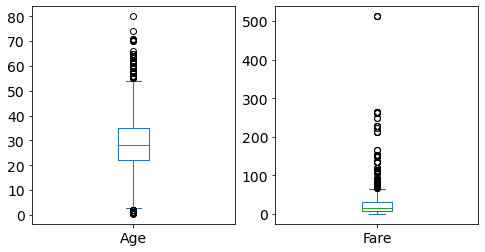

In [94]:
# We don't remove outliers of categorical X columns and in target variable, hence checking outliers for continuous X features
df_continuous.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

In [95]:
# Observations: Both variables "Age" and "Fare" have more outliers



# Removing Outliers using z-score method

In [96]:
# We don't remove outliers of categorical X columns and in target variable, hence removing outliers for continuous X features


In [97]:
df_continuous.columns

Index(['Age', 'Fare'], dtype='object')

In [98]:
df_continuous.shape

(891, 2)

In [99]:
df.shape

(891, 9)

In [100]:
x.shape

(891, 8)

In [101]:
y.shape

(891,)

In [102]:
# Calculating z score & identifying the rows and columns where absolute z score > 3
from scipy.stats import zscore
z=np.abs(zscore(df_continuous))
threshold=3
np.where(z>3)

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851]),
 array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0]))

In [103]:
# Removing the rows in both x and y where the outliers are present in x features with continuous data
df_cont_n=df_continuous[(z<3).all(axis=1)]
x_new1=x[(z<3).all(axis=1)]
y_new1=y[(z<3).all(axis=1)]

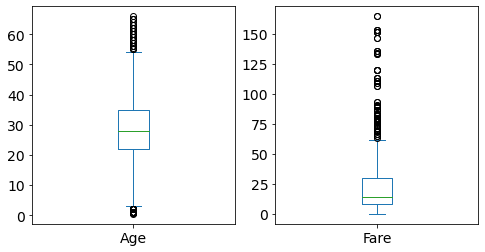

In [104]:
# Plotting features to check for outliers removal
df_cont_n.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

In [105]:
# Observations:

# Plots "Age" and "Fare" shows that outliers are removed

In [106]:
x_new1.shape

(864, 8)

In [107]:
y_new1.shape

(864,)

In [108]:
# Data loss calculation with z-score method
loss_percent_zscore=round((x.shape[0]-x_new1.shape[0])/x.shape[0]*100,1)
loss_percent_zscore

3.0

In [109]:
# Observations:

# Data loss with z-score method is 3%.
# Now I will check the dataloss using IQR method as well and will take a call accordingly

# Removing Outliers using IQR method

In [110]:
# Calculate interquartile range (IQR) for x continuous data
Q1=df_continuous.quantile(0.25)
Q3=df_continuous.quantile(0.75)
IQR=Q3-Q1

# Dataframe with continuous X data after removing outliers
df_continuous_upd = df_continuous[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

# Removing the rows in both x and y where the outliers are present in x features with continuous data
x_new2 = x[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]
y_new2 = y[((df_continuous>=(Q1-1.5*IQR)) & (df_continuous<=(Q3+1.5*IQR))).all(axis=1)]

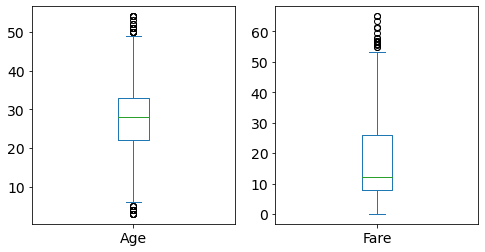

In [111]:
# Plotting features to check for outliers removal
df_continuous_upd.plot(kind="box",subplots=True,layout=(1,2),fontsize=14,figsize=(8,4))
plt.show()

In [112]:
# Observations:

# Plots "Age" and "Fare" shows that outliers are removed

In [113]:
x_new2.shape

(721, 8)

In [114]:
y_new2.shape

(721,)

In [115]:
# Data Loss Calculation with IQR
loss_percent_IQR=round((x.shape[0]-x_new2.shape[0])/x.shape[0]*100,1)
display(loss_percent_IQR)

19.1

In [116]:
# Observations:

# Data loss with IQR is 19.1% which is higher than data loss with z-score (3%)
# hence considering x & y data after removing outliers using zscore method for model building

In [117]:
x=x_new1
y=y_new1

# Skewness Check

In [118]:
# We don't remove skewness from categorical X data and from target variable hence checking skewness on X features with continuous data 
# Segregating continuous X features to check skewness
x_continous=x[["Age","Fare"]].copy()
# Checking skeweness and arranging the values in descending order
x_continous.skew().sort_values(ascending=False) 


Fare    2.257178
Age     0.321096
dtype: float64

In [119]:
# Observations:

# 1) Typically "-0.5 to 0.5" range is fairly symmetrical. In this case "Fare" has skewness more than +0.5.
# 2) I will apply various methods to remove skewness and will consider the one with lowest skewness

# Transforming data to remove skewness

In [121]:
# Method1: Log transformation using numpy
import numpy as np
x2=pd.DataFrame()
x2['Age']=np.log(x['Age'])
x2['Fare']=np.log(x['Fare'])

In [122]:
x2.skew().sort_values(ascending=False)

Age    -2.702431
Fare         NaN
dtype: float64

In [123]:
# Observations: Skewness range: (-2.7,+2.7)

In [124]:
# Method 2: Using PowerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new_pt=pt.fit_transform(x_continous)
x3=pd.DataFrame(data=x_new_pt,columns=x_continous.columns)
x3.skew().sort_values(ascending=False)

Age     0.040783
Fare   -0.009095
dtype: float64

In [125]:
# Observations: Skewness range: (-0.04,+0.04)

In [126]:
# Method3: Using Quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
x_new_qt=qt.fit_transform(x_continous)
x5=pd.DataFrame(data=x_new_qt,columns=x_continous.columns)
x5.skew().sort_values(ascending=False)

Age     0.001319
Fare   -0.002373
dtype: float64

In [127]:
# Observations: Skewness range: (-0.002,+0.002)

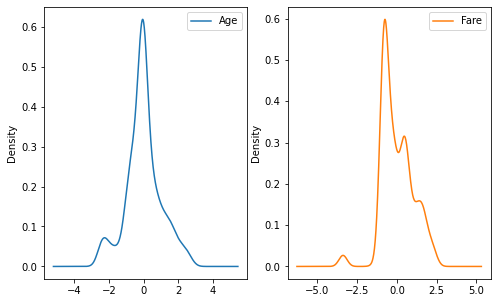

In [128]:
# Visually checking the distribution plots after skewness removal using powertransformer
x3.plot(kind='density',subplots=True,layout=(1,2),sharex=False,legend=True,fontsize=10,figsize=(8,5))
plt.show()

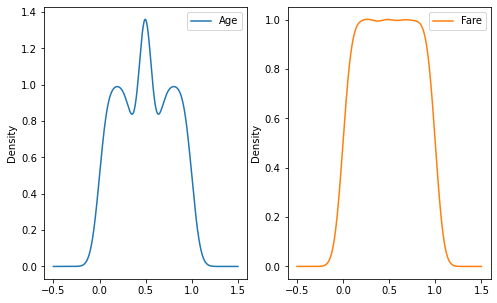

In [129]:
# Visually checking the distribution plots after skewness removal using quantile transformer
x5.plot(kind='density',subplots=True,layout=(1,2),sharex=False,legend=True,fontsize=10,figsize=(8,5))
plt.show()


In [130]:
# Observations:

# As the skewness is least using "quantile transformer", 
# I am using transformed x data from "quantile transformer" for model building

# Scaling data

In [131]:
# Applied standard scaler only on continuous data as we don't scale categorical data
# Here the standard scaler is applied eventhough skewness range is (-0.04,+0.04). This is done to get the normally distributed data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x5_scaled=sc.fit_transform(x5)
x_continuous=pd.DataFrame(data=x5_scaled,columns=x_continous.columns)
x_continuous

,Age,Fare
0,-0.885938,-1.424053
1,1.053250,1.400716
2,-0.524737,-0.811018
3,0.887783,1.242448
4,0.887783,-0.682801
...,...,...
859,-0.454111,-0.109834
860,-1.146245,0.875830
861,-0.016229,0.445103
862,-0.524737,0.875830


In [132]:
x_continuous

,Age,Fare
0,-0.885938,-1.424053
1,1.053250,1.400716
2,-0.524737,-0.811018
3,0.887783,1.242448
4,0.887783,-0.682801
...,...,...
859,-0.454111,-0.109834
860,-1.146245,0.875830
861,-0.016229,0.445103
862,-0.524737,0.875830


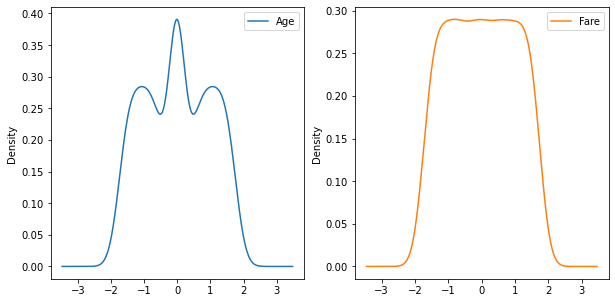

In [133]:
# Visually checking the distribution plots for continuous data after scaling the data
x_continuous.plot(kind='density',subplots=True,layout=(1,2),sharex=False,legend=True,fontsize=10,figsize=(10,5))
plt.show()

In [134]:
# Observations: Scaled the data for all columns with mean=0 and standard deviation=+/- 1

In [135]:
# Getting x_categorical data
# Dropping columns "Age" and "Fare" from unscaled x to get categorical x data
x_cat=x.drop(["Age", "Fare"],axis=1)
x_cat

,Pclass,Parch,Name,Sex,Ticket,Embarked
0,3,0,108.0,1.0,523.0,2.0
1,1,0,190.0,0.0,596.0,0.0
2,3,0,353.0,0.0,669.0,2.0
3,1,0,272.0,0.0,49.0,2.0
4,3,0,15.0,1.0,472.0,2.0
...,...,...,...,...,...,...
886,2,0,548.0,1.0,101.0,2.0
887,1,0,303.0,0.0,14.0,2.0
888,3,2,413.0,0.0,675.0,2.0
889,1,0,81.0,1.0,8.0,0.0


In [136]:
# Checking for the difference in index values between x continuous and x categorical data
(x_continuous.index.values==x_cat.index.values).all()

False

In [137]:
# As the indexing is different between x continuous and x categorical data, I will update x categorical index 
# same as x continuous as I need to combine both of them to get total x data

x_cat["index"]=x_continuous.index.values  # Adding a new column in "x_cat" with index values of "x_continuous"
x_categorical=x_cat.set_index("index") # Changing the index column in "x_cat" to get the same index values of "x_continuous" (scaled x data) 
x_categorical

,Pclass,Parch,Name,Sex,Ticket,Embarked
index,,,,,,
0,3,0,108.0,1.0,523.0,2.0
1,1,0,190.0,0.0,596.0,0.0
2,3,0,353.0,0.0,669.0,2.0
3,1,0,272.0,0.0,49.0,2.0
4,3,0,15.0,1.0,472.0,2.0
...,...,...,...,...,...,...
859,2,0,548.0,1.0,101.0,2.0
860,1,0,303.0,0.0,14.0,2.0
861,3,2,413.0,0.0,675.0,2.0


In [138]:
# Checking for the difference in index values between x continuous and x categorical data
(x_continuous.index.values==x_categorical.index.values).all()


True

In [139]:
# Observations: Index values are same between x continuous and x categorical data
#hence I can combine them to get total x data

In [140]:
# Adding both categorical and continuous x features to get the total x data for model building
x=pd.concat([x_categorical,x_continuous],axis=1)
x

,Pclass,Parch,Name,Sex,Ticket,Embarked,Age,Fare
0,3,0,108.0,1.0,523.0,2.0,-0.885938,-1.424053
1,1,0,190.0,0.0,596.0,0.0,1.053250,1.400716
2,3,0,353.0,0.0,669.0,2.0,-0.524737,-0.811018
3,1,0,272.0,0.0,49.0,2.0,0.887783,1.242448
4,3,0,15.0,1.0,472.0,2.0,0.887783,-0.682801
...,...,...,...,...,...,...,...,...
859,2,0,548.0,1.0,101.0,2.0,-0.454111,-0.109834
860,1,0,303.0,0.0,14.0,2.0,-1.146245,0.875830
861,3,2,413.0,0.0,675.0,2.0,-0.016229,0.445103
862,1,0,81.0,1.0,8.0,0.0,-0.524737,0.875830


In [141]:
# checking if any null values present in x to make sure "concat" operation is correct in the previous step

x.isnull().sum() 

Pclass      0
Parch       0
Name        0
Sex         0
Ticket      0
Embarked    0
Age         0
Fare        0
dtype: int64

In [142]:
x.shape

(864, 8)

In [143]:
y.shape

(864,)

In [144]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

False

In [145]:
# As the indexing is different between x and y data, I will update y index same as x

y_1=pd.DataFrame(data=y)  # Creating the dataframe with y data
# Updating y dataframe index same as x dataframe 
y_1["index"]=x.index.values  # Adding a new column in "y" with index values of "x"
y=y_1.set_index("index") # Changing the index column in "y" to get the same index values of "x" 


In [146]:
# Checking for the difference in index values between x and y
(y.index.values==x.index.values).all()

True

In [147]:
#Observations: Index values are same between x and y hence I can use them for model building

In [148]:
x.shape

(864, 8)

In [149]:
y.shape

(864, 1)

# SMOTE for classfication

In [150]:
# As the target variable classes are imbalanced, 
# using the random oversampling technique "SMOTE" for balancing the classes in target variable

In [151]:
# Checking the value count of target column
y.value_counts()

Survived
0           537
1           327
dtype: int64

In [152]:
x.shape

(864, 8)

In [153]:
y.shape

(864, 1)

In [154]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [155]:
# Checking the value count of target column
y.value_counts()

Survived
0           537
1           537
dtype: int64

In [156]:
# Observations: Classes are balanced in the target column

In [157]:
x.shape

(1074, 8)

In [158]:
y.shape

(1074, 1)

0    537
1    537
Name: Survived, dtype: int64


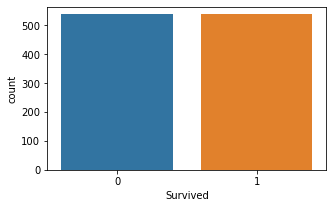

In [159]:
# Visualization of Target Variable
plt.figure(figsize=(5,3))
print(y["Survived"].value_counts())
sns.countplot(y["Survived"])
plt.show()

In [160]:
# Observations: Classes are balanced in the target column

# EDA part is completed and I will proceed with Model Building

# Model Building

In [248]:
# As target variable has two classes, I will use binary classification model and starts with LogisticRegression

In [249]:
# Defining the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

lr=LogisticRegression()  # Defining instance for logisticregression

# Finding the best random state value where training accuracy = testing accuracy

Random_State=[]
Training_Accuracy=[]
Testing_Accuracy=[]
Difference=[]

for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)

    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        Random_State.append(i)
        Training_Accuracy.append(accuracy_score(y_train,pred_train)*100)
        Testing_Accuracy.append(accuracy_score(y_test,pred_test)*100)
        Difference.append((accuracy_score(y_test,pred_test)*100)-(accuracy_score(y_train,pred_train)*100))

RS_table=pd.DataFrame({"Random State":Random_State,"Training Accuracy":Training_Accuracy,"Testing Accuracy":Testing_Accuracy,"Difference":Difference})
print("Table of random state values with training accuracy = testing accuracy")
RS_table.sort_values(by=["Difference"],ascending=True)

Table of random state values with training accuracy = testing accuracy


,Random State,Training Accuracy,Testing Accuracy,Difference
6,516,79.976717,80.000000,0.023283
2,180,79.511059,79.534884,0.023824
9,810,79.511059,79.534884,0.023824
3,286,78.579744,78.604651,0.024907
4,426,78.579744,78.604651,0.024907
8,784,78.579744,78.604651,0.024907
10,939,78.579744,78.604651,0.024907
11,964,78.579744,78.604651,0.024907
0,85,78.114086,78.139535,0.025449
1,125,78.114086,78.139535,0.025449


In [250]:
# Getting the best random state where training accuracy equal to testing accuracy
RSN=RS_table["Random State"][RS_table["Difference"]==RS_table["Difference"].min()]
BRS=np.array(RSN)[0]
BRS

516

In [251]:
# Using the best random state and splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=BRS)

In [252]:
# Training the model and checking  accuracy score with the fixed random state
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(accuracy_score(y_test,pred_test))

0.8


In [253]:
print(classification_report(y_test,pred_test))  # Printing classificatin report

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       118
           1       0.76      0.81      0.79        97

    accuracy                           0.80       215
   macro avg       0.80      0.80      0.80       215
weighted avg       0.80      0.80      0.80       215



In [254]:
print(confusion_matrix(y_test,pred_test))  # printing confusion matrix

[[93 25]
 [18 79]]


# Cross Validation for Logistic Regression

In [255]:
pred_lr=lr.predict(x_test)
from sklearn.model_selection  import cross_val_score
lss=accuracy_score(y_test,pred_lr)

# Finding the optimized folds from Logistic Regression where the cross validation score is same as model score

No_of_Folds=[]
CV_Score=[]
Model_Score=[]
Difference=[]

for j in range(2,11):
    lsscore=cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    No_of_Folds.append(j)
    CV_Score.append(lsc*100)
    Model_Score.append(lss*100)
    Difference.append(abs(lsc-lss))
CV_table=pd.DataFrame({"No of Folds":No_of_Folds,"Cross Validation Score":CV_Score,"Model Score":Model_Score,"Difference":Difference})  
print("Cross Validation table")
CV_table.sort_values(by=["Difference"],ascending=True)

Cross Validation table


,No of Folds,Cross Validation Score,Model Score,Difference
6,8,79.053344,80.0,0.009467
0,2,78.770950,80.0,0.012291
7,9,78.593993,80.0,0.014060
1,3,78.119181,80.0,0.018808
8,10,78.035652,80.0,0.019643
4,6,78.026071,80.0,0.019739
3,5,77.843947,80.0,0.021561
5,7,77.472201,80.0,0.025278
2,4,77.380292,80.0,0.026197


In [256]:
# Getting the best no. of folds where the least difference between cross validation score and model score
CVF=CV_table["No of Folds"][CV_table["Difference"]==CV_table["Difference"].min()]
BCV=np.array(CVF)[0]
BCV

8

In [257]:
# Using best CV value and checking the cross validation score again to compare with model score
lsscore_selected=cross_val_score(lr,x,y,cv=BCV).mean()
print("The CV score is:",lsscore_selected*100,"\nThe accuracy score is:",lss*100)
print("Difference is:",lss-lsscore_selected)

The CV score is: 79.05334438916529 
The accuracy score is: 80.0
Difference is: 0.009466556108347124


# Other Classification Algorithms

In [259]:
# Importing Libraries

from sklearn.naive_bayes import GaussianNB               # GaussianNB Algorithm
from sklearn.tree import DecisionTreeClassifier          # DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier       # KNeighborsClassifier
from sklearn.svm import SVC                              # SVC
from sklearn.ensemble import RandomForestClassifier      # RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier        # ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier  # GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier          # AdaBoostClassifier
from xgboost import XGBClassifier                        # XGBClassifier





In [260]:
# Defining the list with all Algorithms

models=[('GaussianNB()',GaussianNB()),('Decision Tree Classifier()',DecisionTreeClassifier()),
        ('KNeighborsClassifier()',KNeighborsClassifier()),
        ('SVC()',SVC()),('RandomForestClassifier()',RandomForestClassifier()),
        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]
      


In [261]:
# Defining empty lists
Model=[lr]
CV_Score=[lsscore_selected*100]
Model_Score=[lss*100]
Difference=[lss-lsscore_selected]

In [262]:
# Loop for all algorithms to train the model and for the cross validation
for model in models:
    model[1].fit(x_train,y_train)                             # Train the model
    pred_test=model[1].predict(x_test)                        # Predict Y values from the model using X test
    Model_Score.append(accuracy_score(y_test,pred_test)*100)  # Appending "Accuracy score" to the list
    print("Model:",model[0])
    print("Accuracy Score:")
    print(accuracy_score(y_test,pred_test)*100)               # Printing "accuracy_score"
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,pred_test))                 # Printing "confusion_matrix"
    print("Classification Report:")
    print(classification_report(y_test,pred_test))            # Printing "classification_report"
    print('-'*60)
    
    
    score=cross_val_score(model[1],x,y,cv=BCV).mean()         # Cross Validation mean score calculation
    CV_Score.append(score*100)                                # Appending "cross validation score" to the list
    Difference.append(abs(accuracy_score(y_test,pred_test)-score)) # Appending "Difference b/w CV and model scores" to the list
    Model.append(model[0])                                    # Appending "Model" to the list

# Creating the dataframe with scores and the differences
score_table=pd.DataFrame({'Model':Model,'Model Score':Model_Score,'Cross Validation Score':CV_Score,'Difference':Difference})
print("Table with performance of the models")
score_table.sort_values(by=["Difference"],ascending=True)  # sorting the score table using the difference

Model: GaussianNB()
Accuracy Score:
77.20930232558139
Confusion Matrix:
[[91 27]
 [22 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       118
           1       0.74      0.77      0.75        97

    accuracy                           0.77       215
   macro avg       0.77      0.77      0.77       215
weighted avg       0.77      0.77      0.77       215

------------------------------------------------------------
Model: Decision Tree Classifier()
Accuracy Score:
83.25581395348837
Confusion Matrix:
[[94 24]
 [12 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       118
           1       0.78      0.88      0.83        97

    accuracy                           0.83       215
   macro avg       0.83      0.84      0.83       215
weighted avg       0.84      0.83      0.83       215

-------------------------------------------

,Model,Model Score,Cross Validation Score,Difference
5,RandomForestClassifier(),86.046512,86.229270,0.001828
4,SVC(),63.255814,63.693339,0.004375
6,ExtraTreesClassifier(),84.186047,84.741570,0.005555
1,GaussianNB(),77.209302,76.448314,0.007610
0,LogisticRegression(),80.000000,79.053344,0.009467
9,XGBClassifier(),85.581395,84.092731,0.014887
3,KNeighborsClassifier(),68.837209,70.489912,0.016527
7,GradientBoostingClassifier(),86.511628,84.273079,0.022385
2,Decision Tree Classifier(),83.255814,80.827805,0.024280
8,AdaBoostClassifier(),84.651163,82.035655,0.026155


In [263]:
# Getting the best model where the least difference between cross validation score and model score
BMS=score_table["Model"][score_table["Difference"]==score_table["Difference"].min()]
BM=np.array(BMS)[0]
BM  # Best Model

'RandomForestClassifier()'

In [264]:
# Observations: 
#Based on the comparison between model score and cross validation scores for multiple models, 
# I have considered "RandomForestClassifier" is the best model as the difference is least among all the models. 
# Hyper parameter tuning will be pefromed for "RandomForestClassifier".

# Hyper Parameter Tuning

In [317]:
#  Hyper parameter tuning on RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

params={'n_estimators':[13,15],
         'criterion':['entropy','gini'],
         'max_depth':[10,15],
          'min_samples_split':[10,11],
          'min_samples_leaf':[5,6]}



In [318]:
ht_model=RandomForestClassifier

grd=GridSearchCV(ht_model,param_grid=params)
grd.fit(x_train,y_train)

print('best_params=>',grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [319]:
# Reinstantiating with best parameters


ht_model=grd.best_estimator_
ht_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=13)

In [320]:


ht_model.fit(x_train,y_train)
pred=ht_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

86.04651162790698
[[102  16]
 [ 14  83]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       118
           1       0.84      0.86      0.85        97

    accuracy                           0.86       215
   macro avg       0.86      0.86      0.86       215
weighted avg       0.86      0.86      0.86       215



In [321]:
score=cross_val_score(ht_model,x,y,cv=BCV).mean()
print("The CV score is:",score*100,"\nThe accuracy score is:",accuracy_score(y_test,pred)*100)
print("Difference is:",accuracy_score(y_test,pred)-score)

The CV score is: 84.36498065229408 
The accuracy score is: 86.04651162790698
Difference is: 0.016815309756128993


In [296]:
# Observation

# Getting a lil better score before hyperparameter tunning.

# Hence considering the default parameter of Random Forest as the best model

# AUC ROC Curve

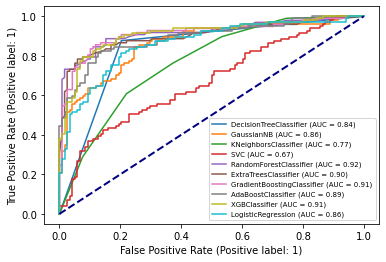

In [301]:
# Checking AUC ROC Curve to compare the multiple models

# from sklearn import datasets
from sklearn import metrics     
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

# models=[('GaussianNB()',GaussianNB()),('RandomForestClassifier()',RandomForestClassifier()),
#        ('KNeighborsClassifier()',KNeighborsClassifier()),
#        ('SVC()',SVC()),(' Decision Tree Classifier()', Decision Tree Classifier()),
#        ('ExtraTreesClassifier()',ExtraTreesClassifier()),('GradientBoostingClassifier()',GradientBoostingClassifier()),
#        ('AdaBoostClassifier()',AdaBoostClassifier()),('XGBClassifier()',XGBClassifier())]
#        

# Initially Plotting the AUC ROC curve for Random Forest
disp=plot_roc_curve(models[1][1],x_test,y_test)  

# Basically plot_roc_curve function plot the roc_curve for the classifier. Here we store the first gragh in the variable "disp"
# and access its axis and provide to the next plot_roc_curve function, so that the plot appear of the axes of the first graph only
# If we dont specify "ax", it will plot multiple graphs

# Plotting the AUC ROC curve for remaining models with same axis of Random Forest
plot_roc_curve(models[0][1],x_test,y_test,ax=disp.ax_) 

plot_roc_curve(models[2][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[3][1],x_test,y_test,ax=disp.ax_)

plot_roc_curve(models[4][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[5][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[6][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[7][1],x_test,y_test,ax=disp.ax_)
plot_roc_curve(models[8][1],x_test,y_test,ax=disp.ax_)


plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)

plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')

plt.legend(prop={'size':7},loc='lower right')
plt.show()

In [286]:
# Observations:

# Many models are performing well.

# Random Forest is the best model based on the least difference between model accuracy score & cross validation score

# Hence saving Random Forest Classifier as the final model for deployment


In [314]:
import joblib
joblib.dump(RandomForestClassifier,'titanic.pkl')

['titanic.pkl']

In [315]:
loaded_model=joblib.load('titanic.pkl')
prediction=loaded_model.predict(x_test)

In [316]:
prediction

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])